<a href="https://colab.research.google.com/github/joshtrivedi/Machine-Learning/blob/main/Hierarchical-Assignment/Hierarchical_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
dataset = pd.read_csv('beer_data.csv', decimal=',')
dataset.columns = ['date', 'med_temp', 'min_temp','max_temp', 'precipitation','isWeekend','consumption']

In [33]:
dataset

,date,med_temp,min_temp,max_temp,precipitation,isWeekend,consumption
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
dataset = dataset.dropna()

In [35]:
dataset

,date,med_temp,min_temp,max_temp,precipitation,isWeekend,consumption
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,1.0,32.307
361,2015-12-28,22.64,21.1,26.7,0.0,0.0,26.095
362,2015-12-29,21.68,20.3,24.1,10.3,0.0,22.309
363,2015-12-30,21.38,19.3,22.4,6.3,0.0,20.467


In [36]:
dataset['consumption'] = dataset['consumption'].astype(float) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           365 non-null    object 
 1   med_temp       365 non-null    float64
 2   min_temp       365 non-null    float64
 3   max_temp       365 non-null    float64
 4   precipitation  365 non-null    float64
 5   isWeekend      365 non-null    float64
 6   consumption    365 non-null    float64
dtypes: float64(6), object(1)
memory usage: 22.8+ KB


In [40]:
X = dataset.iloc[:,[1,-1]].values

In [41]:
X

array([[27.3  , 25.461],
       [27.02 , 28.972],
       [24.82 , 30.814],
       [23.98 , 29.799],
       [23.82 , 28.9  ],
       [23.78 , 28.218],
       [24.   , 29.732],
       [24.9  , 28.397],
       [28.2  , 24.886],
       [26.76 , 37.937],
       [27.62 , 36.254],
       [25.96 , 25.743],
       [25.52 , 26.99 ],
       [25.96 , 31.825],
       [25.86 , 25.724],
       [26.5  , 29.938],
       [28.86 , 37.69 ],
       [28.26 , 30.524],
       [28.22 , 29.265],
       [27.68 , 35.127],
       [25.32 , 29.13 ],
       [21.74 , 25.795],
       [21.04 , 21.784],
       [23.12 , 28.348],
       [24.4  , 31.088],
       [22.4  , 21.52 ],
       [23.6  , 29.972],
       [25.68 , 22.603],
       [25.   , 22.696],
       [22.8  , 26.845],
       [21.64 , 27.03 ],
       [24.16 , 32.057],
       [22.48 , 24.097],
       [23.16 , 31.655],
       [22.12 , 24.738],
       [20.28 , 19.95 ],
       [21.06 , 22.821],
       [21.86 , 28.893],
       [22.76 , 29.926],
       [24.   , 24.062],


In [42]:
X.shape

(365, 2)

In [43]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

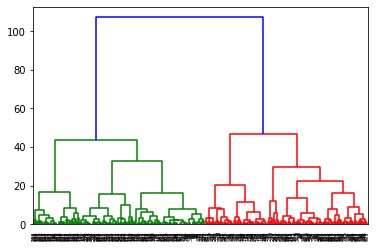

In [44]:
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))

In [45]:
hc =  AgglomerativeClustering(n_clusters=5,linkage='ward')
y_hc = hc.fit_predict(X)
y_hc

array([2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2,
       3, 0, 0, 3, 0, 2, 2, 2, 0, 0, 2, 0, 2, 3, 3, 0, 0, 2, 3, 2, 2, 2,
       0, 2, 4, 3, 3, 3, 2, 0, 0, 2, 2, 2, 3, 2, 2, 0, 0, 2, 3, 0, 3, 0,
       2, 3, 3, 3, 3, 3, 0, 0, 3, 2, 3, 3, 2, 0, 4, 3, 3, 3, 0, 2, 0, 2,
       2, 2, 3, 3, 4, 0, 0, 3, 1, 4, 3, 4, 0, 4, 3, 3, 3, 3, 3, 0, 0, 2,
       0, 3, 3, 2, 0, 0, 3, 3, 3, 1, 1, 4, 0, 4, 3, 1, 1, 1, 4, 4, 1, 1,
       1, 1, 1, 4, 4, 3, 4, 3, 3, 3, 0, 0, 2, 3, 2, 4, 1, 4, 4, 1, 1, 1,
       4, 4, 0, 0, 4, 3, 3, 2, 3, 0, 0, 1, 1, 4, 4, 1, 1, 4, 4, 0, 1, 1,
       1, 4, 4, 4, 3, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 4, 0, 2, 2, 0, 3, 3,
       4, 0, 3, 1, 1, 1, 3, 1, 4, 1, 1, 1, 4, 4, 0, 0, 4, 0, 3, 4, 2, 0,
       0, 3, 4, 4, 3, 4, 0, 4, 3, 3, 4, 1, 4, 0, 0, 4, 1, 4, 1, 1, 0, 0,
       2, 3, 1, 4, 1, 1, 4, 3, 1, 1, 3, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 3, 2, 0, 3, 2, 4, 4, 4, 3, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 2, 0, 1, 4, 2, 0, 4, 4, 4, 4, 0, 0, 4,

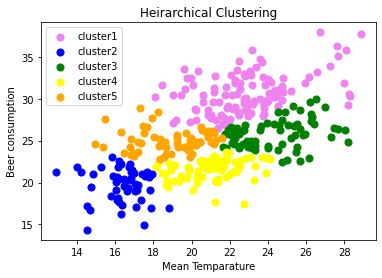

In [46]:
#Agglomerative plot
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=50,c='violet',label='cluster1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=50,c='blue',label='cluster2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=50,c='green',label='cluster3')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=50,c='yellow',label='cluster4')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=50,c='orange',label='cluster5')
plt.title('Heirarchical Clustering')
plt.xlabel('Mean Temparature')
plt.ylabel('Beer consumption')
plt.legend()

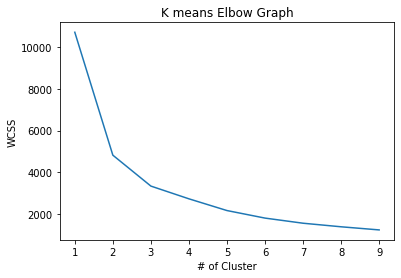

In [48]:
#K means elbow plot
wcss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)#residual values 
plt.plot(range(1,10),wcss)
plt.title('K means Elbow Graph')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

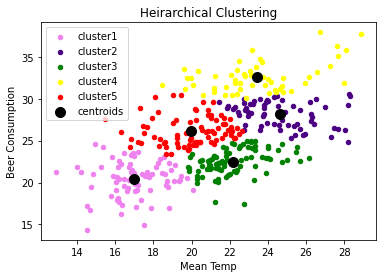

In [52]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=20,c='violet',label='cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=20,c='indigo',label='cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=20,c='green',label='cluster3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=20,c='yellow',label='cluster4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=20,c='red',label='cluster5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='centroids')

plt.title('Heirarchical Clustering')
plt.xlabel('Mean Temp')
plt.ylabel('Beer Consumption')
plt.legend()  
plt.show()